In [1]:
import matplotlib.pyplot as plt
import numpy as np
import h5py
import os
import sys
sys.path.append('../utils/')
from analysis_fns import normalize_images, display_images
import umap

num_train = 3000
num_embed = 10000

data_dir = '/arc/projects/unions/HSC_h5/'
out_path = os.path.join(data_dir, 'HSC_zspec_GRIZY_64_train.h5')

with h5py.File(out_path, "r") as f:   
    for k in f.keys():
        print(k, f[k].shape)
        
    cutouts = f['cutouts'][:num_embed]

# Normalize
cut_means = np.mean(cutouts, axis=(1,2,3), keepdims=True)
cut_stds = np.std(cutouts, axis=(1,2,3), keepdims=True)
cutouts = (cutouts - cut_means) / cut_stds

2024-01-23 20:02:36.725778: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 20:02:36.725912: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 20:02:36.732967: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 20:02:36.757838: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-01-23 20:03:37.263272: W tensorflow/compiler/tf2

cutouts (355968, 5, 64, 64)
dec (355968,)
ra (355968,)
zspec (355968,)
zspec_err (355968,)


In [2]:
reducer1 = umap.UMAP()
reducer1.fit(cutouts[:num_train].reshape((num_train,-1)))
embedding = reducer1.transform(cutouts.reshape((num_embed,-1)))

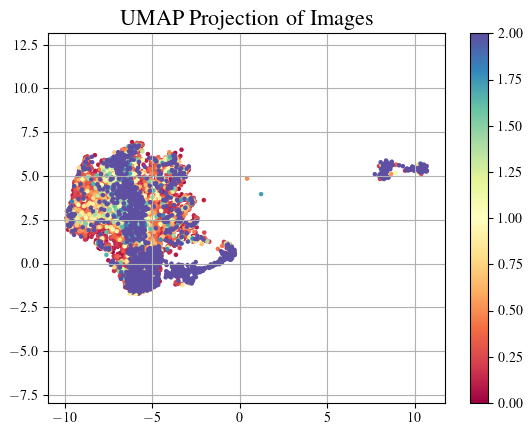

In [3]:
order = np.argsort(cut_stds.flatten())

pts = plt.scatter(embedding[order, 0], embedding[order, 1], c=cut_stds.flatten()[order], cmap='Spectral', s=5, vmin=0, vmax=2)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(pts)
plt.grid()
plt.title('UMAP Projection of Images', fontsize=16)
plt.show()

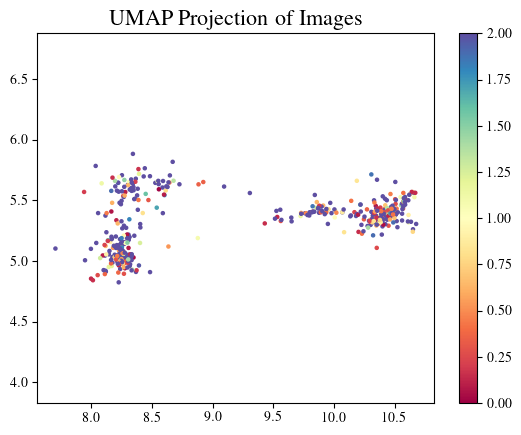

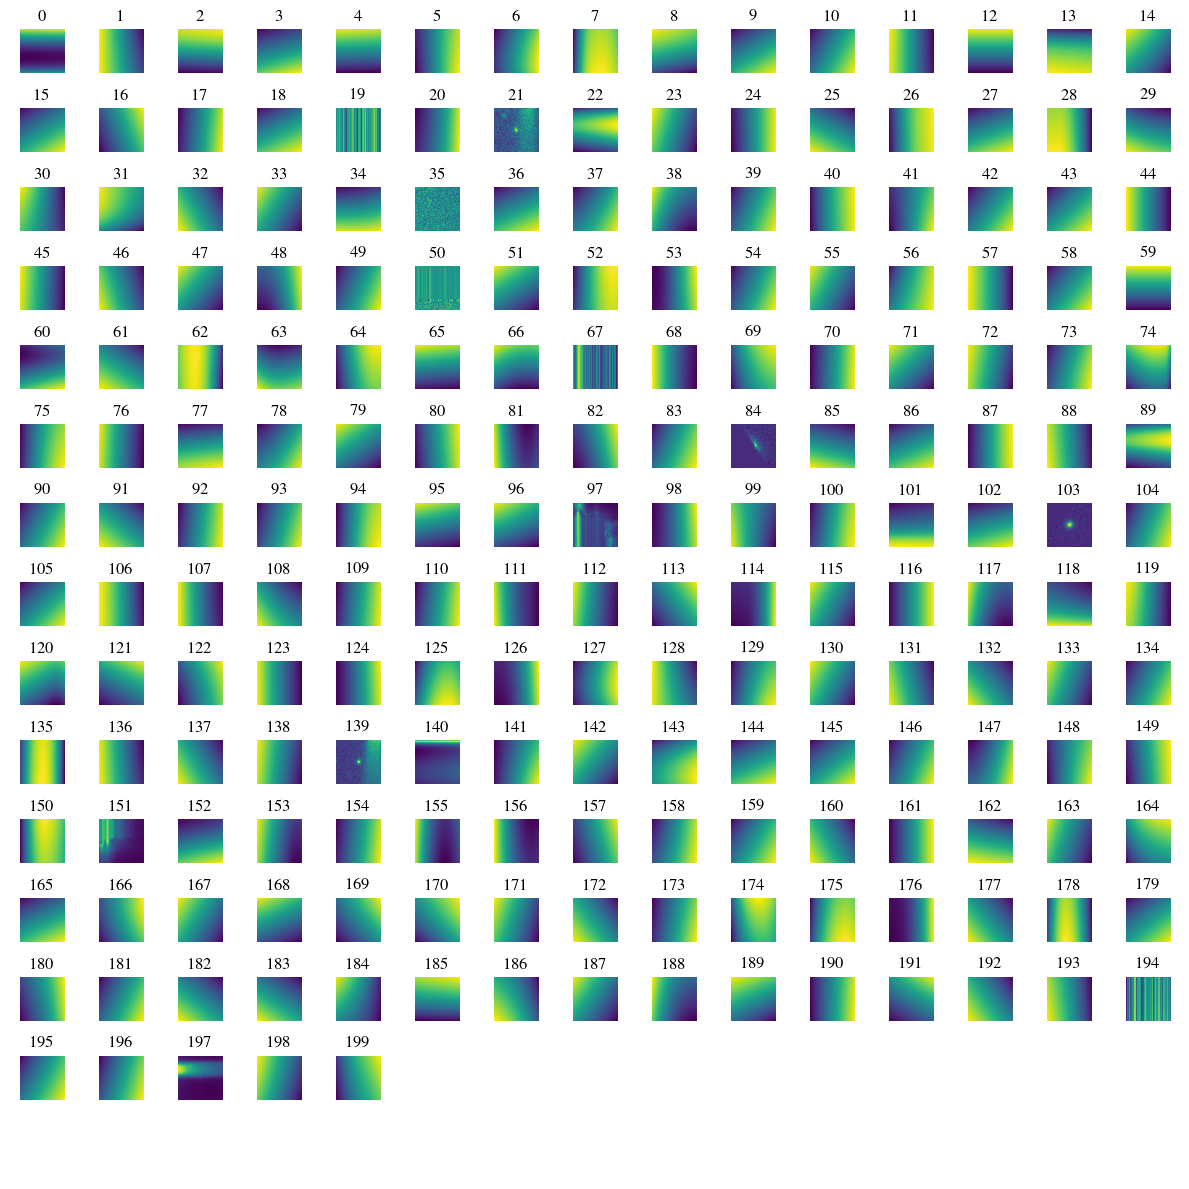

In [4]:
x_range = [5,16]
y_range = [4, 8]
indices = np.where((embedding[:,0]>x_range[0]))[0] #np.where((embedding[:,0]>x_range[0]) & (embedding[:,0]<x_range[1]) &
           #        (embedding[:,1]>y_range[0]) & (embedding[:,1]<y_range[1]))[0]

pts = plt.scatter(embedding[indices, 0], embedding[indices, 1], c=cut_stds.flatten()[indices], cmap='Spectral', s=5, vmin=0, vmax=2)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(pts)
plt.title('UMAP Projection of Images', fontsize=16)
plt.show()

channel = 3
num_samples = 200

# Display images with largest residuals
display_images(normalize_images(cutouts[indices[:num_samples],channel]), vmin=0., vmax=1)

In [8]:
num_train = 3000
num_embed = 10000

data_dir = '/arc/projects/unions/HSC_h5/'
out_path = os.path.join(data_dir, 'HSC_zspec_GRIZY_64_train.h5')

with h5py.File(out_path, "r") as f:   
    for k in f.keys():
        print(k, f[k].shape)
        
    cutouts = f['cutouts'][:num_embed]

# Normalize
cut_means = np.mean(cutouts, axis=(1,2,3), keepdims=True)
cut_stds = np.std(cutouts, axis=(1,2,3), keepdims=True)
cutouts = (cutouts - cut_means) / cut_stds

# Perform embedding
embedding = reducer1.transform(cutouts.reshape((cutouts.shape[0],-1)))

# Make cuts
bad_indices = np.where((embedding[:,0]>x_min))[0]
keep_indices = [i for i in range(len(embedding)) if i not in bad_indices]

cutouts = cutouts[keep_indices]
cut_means = cut_means[keep_indices]
cut_stds = cut_stds[keep_indices]

cutouts (355968, 5, 64, 64)
dec (355968,)
ra (355968,)
zspec (355968,)
zspec_err (355968,)


In [9]:
cutouts.shape

(9534, 5, 64, 64)

In [10]:
reducer2 = umap.UMAP()
reducer2.fit(cutouts[:num_train].reshape((num_train,-1)))
embedding = reducer2.transform(cutouts.reshape((cutouts.shape[0],-1)))

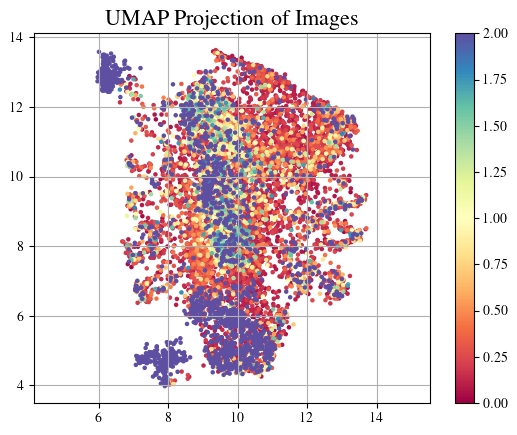

In [11]:
order = np.argsort(cut_stds.flatten())

pts = plt.scatter(embedding[order, 0], embedding[order, 1], c=cut_stds.flatten()[order], cmap='Spectral', s=5, vmin=0, vmax=2)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(pts)
plt.grid()
plt.title('UMAP Projection of Images', fontsize=16)
plt.show()

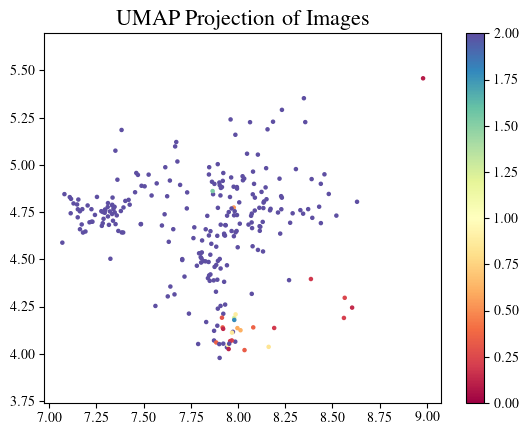

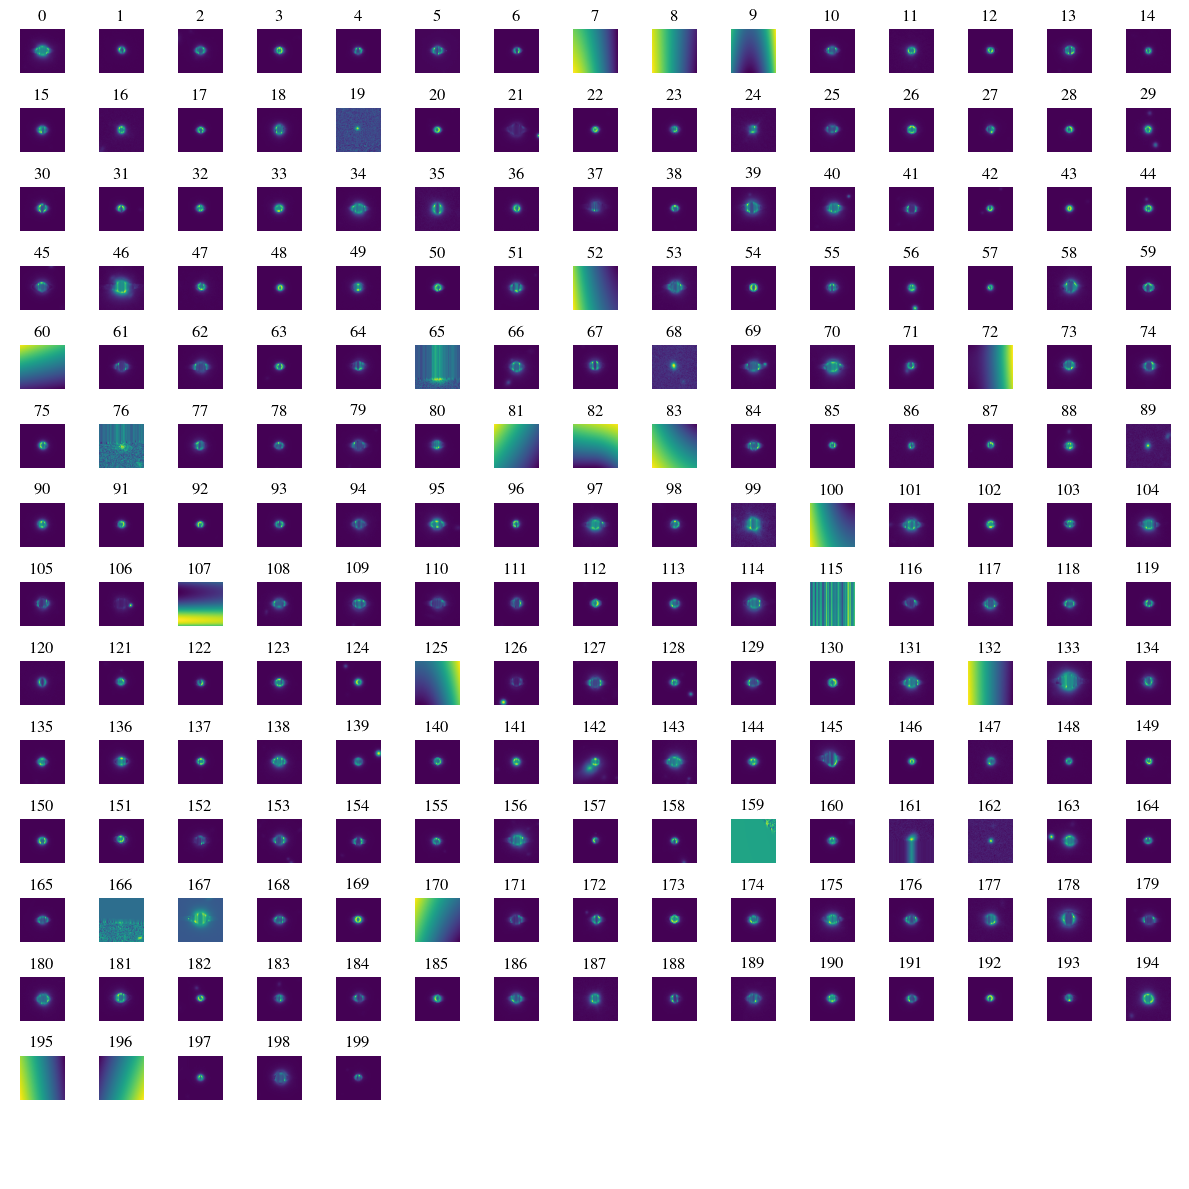

In [13]:
x_range = [7,9]
y_range = [3, 5.5]
indices = np.where((embedding[:,0]>x_range[0]) & (embedding[:,0]<x_range[1]) &
                   (embedding[:,1]>y_range[0]) & (embedding[:,1]<y_range[1]))[0]

pts = plt.scatter(embedding[indices, 0], embedding[indices, 1], c=cut_stds.flatten()[indices], cmap='Spectral', s=5, vmin=0, vmax=2)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(pts)
plt.title('UMAP Projection of Images', fontsize=16)
plt.show()

channel = 1
num_samples = 200

# Display images with largest residuals
display_images(normalize_images(cutouts[indices[:num_samples],channel]), vmin=0., vmax=1)

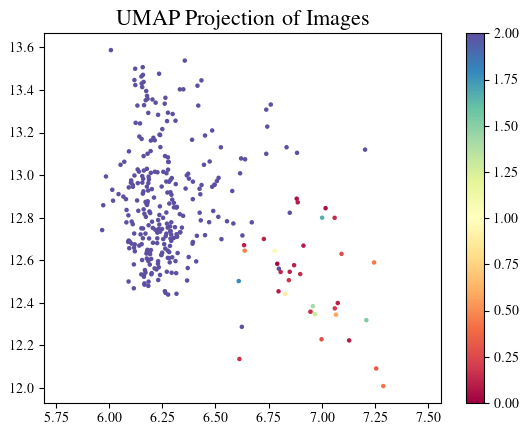

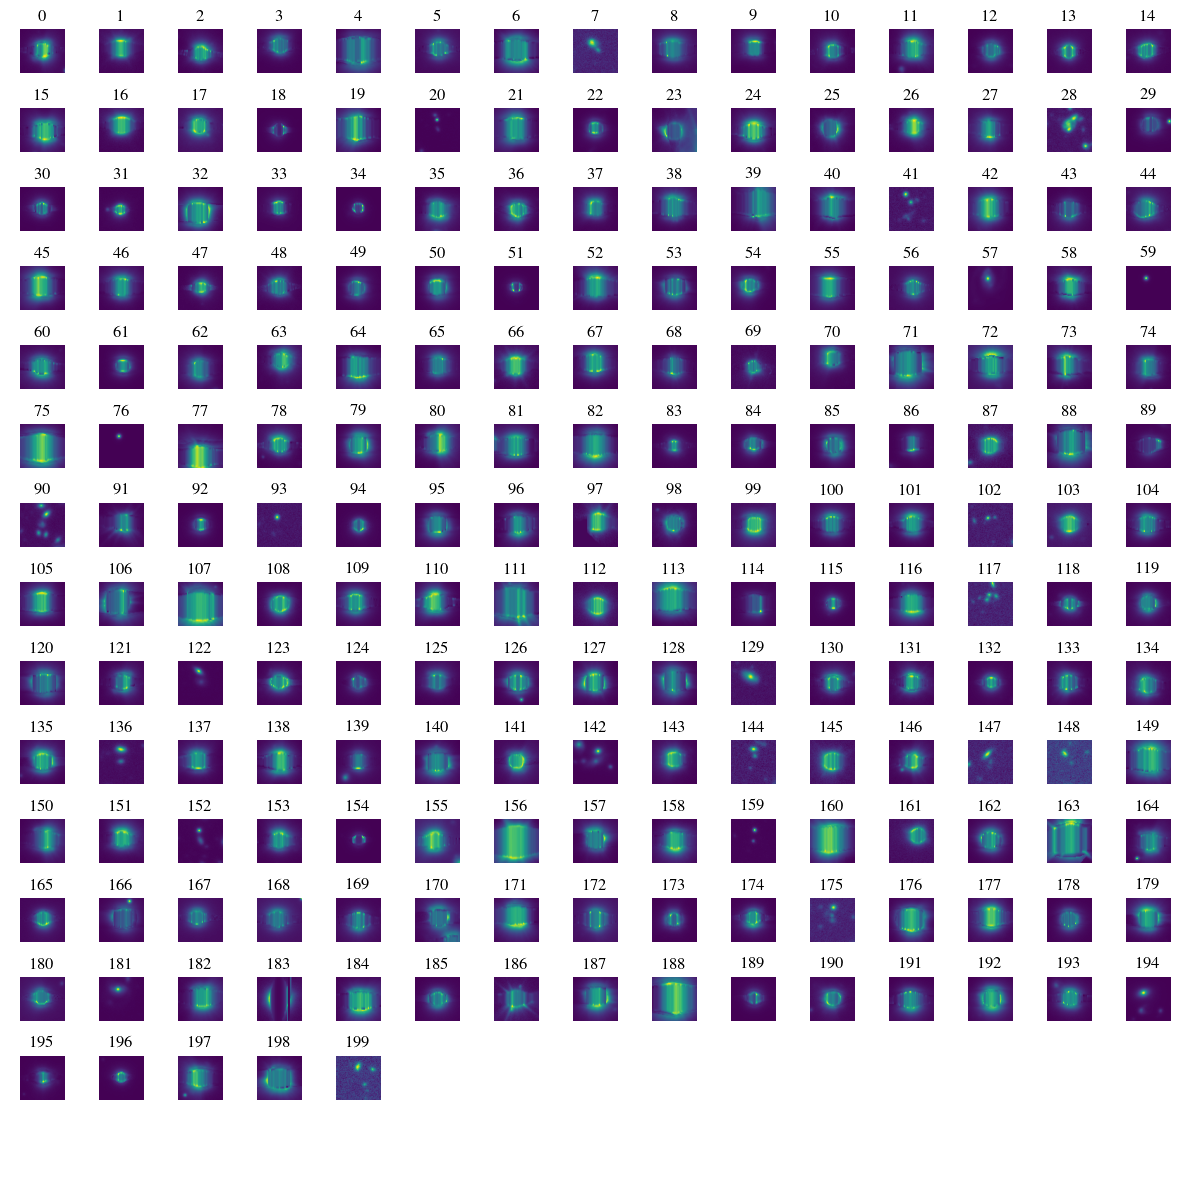

In [15]:
x_range = [3, 7.5]
y_range = [12, 14]
indices = np.where((embedding[:,0]>x_range[0]) & (embedding[:,0]<x_range[1]) &
                   (embedding[:,1]>y_range[0]) & (embedding[:,1]<y_range[1]))[0]

pts = plt.scatter(embedding[indices, 0], embedding[indices, 1], c=cut_stds.flatten()[indices], cmap='Spectral', s=5, vmin=0, vmax=2)
plt.gca().set_aspect('equal', 'datalim')
plt.colorbar(pts)
plt.title('UMAP Projection of Images', fontsize=16)
plt.show()

channel = 1
num_samples = 200

# Display images with largest residuals
display_images(normalize_images(cutouts[indices[:num_samples],channel]), vmin=0., vmax=1)

In [34]:
data_dir = '/arc/projects/ots/HSC_h5/'
old_path = os.path.join(data_dir, 'HSC_strong_lens_candidates_GRIZY_64.h5')
new_path = os.path.join(data_dir, 'HSC_strong_lens_candidates_GRIZY_64_new.h5')
batch_size = 1024

x_min1 = 5
x_range2 = [7,9]
y_range2 = [3, 5.5]
x_range3 = [3, 7.5]
y_range3 = [12, 14]

with h5py.File(old_path, 'r') as f_old:
    with h5py.File(new_path, 'w') as f_new:

        for k in f_old.keys():
            # Create the same datasets as orig file
            shape = list(f_old[k].shape)
            shape[0] = 0
            maxshape = shape.copy()
            maxshape[0] = None
            f_new.create_dataset(k, shape=tuple(shape), maxshape=maxshape)
        
        n_orig = len(f_old['cutouts'])
        print(f'Going through {n_orig} data samples in {n_orig//batch_size + 1} batches...')
        for start_i in range(0, n_orig, batch_size):
            cutouts = f_old['cutouts'][start_i:start_i+batch_size]
            
            # Normalize
            cut_means = np.mean(cutouts, axis=(1,2,3), keepdims=True)
            cut_stds = np.std(cutouts, axis=(1,2,3), keepdims=True)
            cutouts = (cutouts - cut_means) / cut_stds

            # Create embeddings
            embedding1 = reducer1.transform(cutouts.reshape((cutouts.shape[0],-1)))
            embedding2 = reducer2.transform(cutouts.reshape((cutouts.shape[0],-1)))

            # Make cuts
            bad_indices1 = np.where((embedding1[:,0]>x_min1))[0]
            bad_indices2 = np.where((embedding2[:,0]>x_range2[0]) & (embedding2[:,0]<x_range2[1]) &
                                    (embedding2[:,1]>y_range2[0]) & (embedding2[:,1]<y_range2[1]))[0]
            bad_indices3 = np.where((embedding2[:,0]>x_range3[0]) & (embedding2[:,0]<x_range3[1]) &
                                    (embedding2[:,1]>y_range3[0]) & (embedding2[:,1]<y_range3[1]))[0]
            bad_indices = np.concatenate((bad_indices1, bad_indices2, bad_indices3))
            
            keep_indices = [i for i in range(len(cutouts)) if i not in bad_indices]
            num_samples = len(keep_indices)
        
            for k in f_old.keys():

                ds_out = f_new[k]
                    
                # Collect data from in file
                data_in = f_old[k][start_i:start_i+batch_size][keep_indices]
                
                # Resize the dataset to accommodate the new data
                ds_out.resize(ds_out.shape[0] + num_samples, axis=0)
                
                # Add the new data
                ds_out[-num_samples:] = data_in

            print(f'{int(start_i/batch_size + 1)} batches complete...', end='\r')

        n_new = len(f_new['cutouts'])
        print(f'Finished creating file {new_path} using {n_new/n_orig*100:0.1f}% of the original data.')

Going through 51 data samples in 1 batches...
Finished creating file /arc/projects/ots/HSC_h5/HSC_strong_lens_candidates_GRIZY_64_new.h5 using 100.0% of the original data.


In [33]:
print('a')

a


In [26]:
n_new/n_orig*100

89.21813196691838